# Binomial Model

The binomial model depends on a few variables:

$u = $ Change in the 'up' state <br>
$d = $ Change in the 'down' state (commonly assumed to be $d=1/u$) <br>
$p_u = $ Probability of the up state <br>
$p_d = 1- p_u =$ Probability of the down state <br>

Using these variables, a tree of prices (and payoffs) are created to value the option in question. In this course, we will be using the Cox Ross Rubinstein method, which assumes:

$u = e^{\sigma \sqrt{\Delta t}}$<br>
$d = 1/u = e^{-\sigma \sqrt{\Delta t}}$<br>
$p_u = \frac{e^{r\Delta t}-d}{u-d}$ <br>
$p_d = 1-p_u$<br>
<br>
Where:

$r=$ Risk free rate <br>
$t=$ Time to maturity <br>
$\Delta t =$ Change in time for each step <br>
$\sigma=$ Asset volatility <br>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt

1.0935646911485417 0.5056377325958349


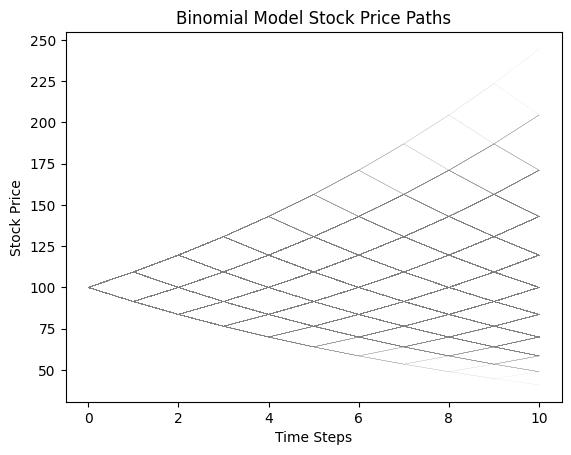

In [109]:
# Create paths for the binomial model and show them on a chart

# Constants
YEARS = 2
TIME_STEP_FRACTION = 1 / 5  # number of time steps per year
SIGMA = 0.2  # volatility of the asset
STARTING_PRICE = 100
RISK_FREE_RATE = 0.025

time_steps = int(YEARS / TIME_STEP_FRACTION)
up_move = np.exp(SIGMA*np.sqrt(TIME_STEP_FRACTION))
down_move = 1/up_move
probability_up = (np.exp(RISK_FREE_RATE*TIME_STEP_FRACTION)-down_move)/(up_move-down_move)
print(up_move, probability_up)
disc = np.exp(RISK_FREE_RATE*YEARS)

paths_so_far = np.array([[STARTING_PRICE]])

def add_timestep(paths_so_far):
    new_paths = []
    for path in paths_so_far:
        new_paths.append(np.append(path, path[-1] * up_move))
        new_paths.append(np.append(path, path[-1] * down_move))
    return np.array(new_paths)

new_paths = add_timestep(paths_so_far)

for i in range(time_steps - 1):
    new_paths = add_timestep(new_paths)

# create a line chart of the new_paths
for path in new_paths:
    plt.plot(path, color='grey', linewidth=0.05)

plt.xlabel('Time Steps')
plt.ylabel('Stock Price')
plt.title('Binomial Model Stock Price Paths')
plt.show()

In [ ]:
# calculate the probability of each end price
for i in range(0,time_steps+1):
    x = math.comb(time_steps,i) * (pt ** i) * ((1-pt)**(N-i)) * call_value(S0 * (u **i)*(d **(N-i)),K)
    total = total + x
return 1/disc * total

In [90]:
print (np.exp(1))
print (np.pi)

2.718281828459045
3.141592653589793
